In [2]:
# importar pandas
import pandas as pd

# Regplot para fazer análise da relação linear
from seaborn import regplot

In [3]:
# Ler e printar dados
Dados = pd.read_csv("Data\Base_Completa.csv", sep=";", index_col="Horario")
Dados.head()

,Tweets,Sentimento,Close,Retornos
Horario,,,,
2022-03-02 03:00:00+00:00,RT @WatcherGuru: BREAKING: Airbnb CEO says the...,0.5994,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @nima33514465: @BluesparrowC @TheMoonCarl @...,0.3612,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @ICOAnnouncement: 🎙 New Featured Project\r\...,0.5859,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @AirdropStario: 💧 Farcana Airdrop 💧\r\n\r\n...,0.4753,44370.246094,NaN
2022-03-02 03:00:00+00:00,RT @AirdropStario: 💧 Farcana Airdrop 💧\r\n\r\n...,0.4753,44370.246094,NaN


In [4]:
# Transformar o índice em objeto de datas (DateTime)
Dados.index = pd.to_datetime(Dados.index)
Dados.index

DatetimeIndex(['2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               '2022-03-02 03:00:00+00:00', '2022-03-02 03:00:00+00:00',
               ...
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00',
               '2022-04-06 02:00:00+00:00', '2022-04-06 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Horario', length=93178, freq=None)

In [5]:
# Existem dados faltantes?
Dados.isna().sum()

Tweets          0
Sentimento      0
Close           0
Retornos      100
dtype: int64

In [6]:
# Os 100 valores NA da coluna retornos são causados pelo cálculo da variação percentual, que não podem ser feitos para
# O primeiro ponto de dados, no caso, a primeira hora em que os tweets foram coletados.
# Dropar as linhas com valores nulos
Dados = Dados.dropna()
Dados.isna().sum()

Tweets        0
Sentimento    0
Close         0
Retornos      0
dtype: int64

In [7]:
# Conferir os valores da coluna retorno
Dados.head()

,Tweets,Sentimento,Close,Retornos
Horario,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187


In [8]:
# Retornos em forma de percentual
Dados["Ret_Pct"] = Dados["Retornos"] * 100

In [9]:
# Descrever valores
Dados.describe()

,Sentimento,Close,Retornos,Ret_Pct
count,93078.000000,93078.000000,93078.000000,93078.000000
mean,0.247005,42866.617721,-0.000021,-0.002097
std,0.412549,3111.595576,0.005686,0.568606
min,-0.986300,37351.300781,-0.040160,-4.016016
25%,0.000000,39507.636719,-0.002294,-0.229396
50%,0.025800,42499.882812,0.000275,0.027466
75%,0.585900,45950.597656,0.002447,0.244668
max,0.997100,47938.140625,0.046091,4.609079


In [10]:
# Observar correlações entre as variáveis numéricas
Dados.corr()

,Sentimento,Close,Retornos,Ret_Pct
Sentimento,1.000000,-0.018273,-0.001543,-0.001543
Close,-0.018273,1.000000,0.028697,0.028697
Retornos,-0.001543,0.028697,1.000000,1.000000
Ret_Pct,-0.001543,0.028697,1.000000,1.000000


Correlação dos retornos com o valor do sentimento é extremamente pequena

In [11]:
# Exemplo de pegar sentimento para uma hora específica
Dados.loc["2022-03-03 03"]["Sentimento"]

Horario
2022-03-03 03:00:00+00:00   -0.4023
2022-03-03 03:00:00+00:00    0.2023
2022-03-03 03:00:00+00:00    0.5079
2022-03-03 03:00:00+00:00    0.0000
2022-03-03 03:00:00+00:00    0.7906
                              ...  
2022-03-03 03:00:00+00:00    0.7650
2022-03-03 03:00:00+00:00    0.4331
2022-03-03 03:00:00+00:00   -0.4939
2022-03-03 03:00:00+00:00    0.0000
2022-03-03 03:00:00+00:00    0.2500
Name: Sentimento, Length: 100, dtype: float64

In [12]:
# Distribuição de valores de sentimento
Marco["Sentimento"].hist(bins=10)

NameError: name 'Marco' is not defined

Grande maior parte dos dados de sentimento estão entre 0 e -0,25. Quando se trata de sentimentos positivos, estes tendem a ser mais intensos, com pouca quantidade estando entre 0 e 0,25. Uma interpretação é que a maior parte das opiniões emitidas quanto ao bitcoin são levemente céticas, mas aqueles que acreditam no criptoativo são grandes defensores deste.

In [13]:
# Somar os valores de sentimento para uma hora, a fim de se obter o sentimento geral.
# Se o total >0, então o sentimento naquela hora foi positivo, se não, foi negativo
def Obter_Sentimento_Hora(mes,dia,hora):
    hora = f"0{hora}" if hora <10 else hora
    Agreg_numerico = Dados.loc[f"2022-0{mes}-0{dia} {hora}"]["Sentimento"].sum()
    Sentimento = "Positivo" if Agreg_numerico > 0 else "Negativo"
    return Sentimento

# Resultados
Obter_Sentimento_Hora(3, 6, 8)

'Positivo'

In [14]:
# Criar coluna que transforma variável sentimento em variável categórica binária
Dados["Sentimento_Categorico"] = ["Positivo" if sentimento > 0 else "Negativo" for sentimento in Dados["Sentimento"]]
Dados.head()

,Tweets,Sentimento,Close,Retornos,Ret_Pct,Sentimento_Categorico
Horario,,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,-0.218694,Negativo
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,-0.218694,Positivo
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,-0.218694,Negativo
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,-0.218694,Negativo
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,-0.218694,Positivo


In [15]:
# Predominância dos valores de sentimento neutro (em %)
Dados.loc[Dados["Sentimento"] == 0,"Sentimento_Categorico"].shape[0] / Dados.shape[0]

0.38016502288403276

In [16]:
# Criar categoria "Neutro" para valores de sentimento == 0
Dados.loc[Dados["Sentimento"] == 0,"Sentimento_Categorico"] = "Neutro"
Dados

,Tweets,Sentimento,Close,Retornos,Ret_Pct,Sentimento_Categorico
Horario,,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,-0.218694,Neutro
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,-0.218694,Positivo
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,-0.218694,Neutro
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,-0.218694,Negativo
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,-0.218694,Positivo
...,...,...,...,...,...,...
2022-04-06 02:00:00+00:00,@mckalyn Hi. \r\nDo you seek financial freedom...,0.7941,45256.906250,0.001428,0.142844,Positivo
2022-04-06 02:00:00+00:00,RT @PoloSpaceTravel: 🚀Latest News: Poloniex wi...,0.0000,45256.906250,0.001428,0.142844,Neutro
2022-04-06 02:00:00+00:00,RT @airdropinspect: New airdrop: Yield360 (Y36...,0.8766,45256.906250,0.001428,0.142844,Positivo


<AxesSubplot:>

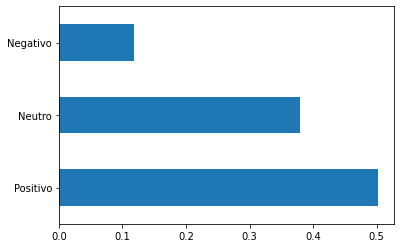

In [17]:
# Plotar frequência dos sentimentos
(Dados["Sentimento_Categorico"].value_counts() / Dados.shape[0]).plot(kind="barh")

<AxesSubplot:xlabel='Sentimento', ylabel='Ret_Pct'>

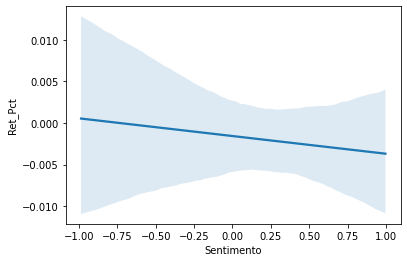

In [18]:
# Regression Plot 
regplot(x=Dados["Sentimento"], y=Dados["Ret_Pct"], scatter=False, fit_reg=True)

,Tweets,Sentimento,Close,Retornos,Ret_Pct,Sentimento_Categorico
Horario,,,,,,
2022-03-02 04:00:00+00:00,"RT @BitcoinStimulus: $7,852 (+554%)\r\n\r\n#bi...",0.0000,44273.210938,-0.002187,-0.218694,Neutro
2022-03-02 04:00:00+00:00,@TheMoonCarl You say you’re willing to gain we...,0.5994,44273.210938,-0.002187,-0.218694,Positivo
2022-03-02 04:00:00+00:00,RT @Cointelegraph: Some on-chain stats still b...,0.0000,44273.210938,-0.002187,-0.218694,Neutro
2022-03-02 04:00:00+00:00,"RT @bre_jew: @bitcoin_brown omg, I'm getting f...",-0.5574,44273.210938,-0.002187,-0.218694,Negativo
2022-03-02 04:00:00+00:00,RT @BTC_Archive: 💥El Salvador President: The i...,0.3400,44273.210938,-0.002187,-0.218694,Positivo
...,...,...,...,...,...,...
2022-04-02 22:00:00+00:00,@DiarioBitcoin hola si estas buscando donde in...,0.0000,46140.714844,-0.002625,-0.262456,Neutro
2022-04-02 22:00:00+00:00,@KFost24 What do you think about the trend of ...,0.0000,46140.714844,-0.002625,-0.262456,Neutro
2022-04-02 22:00:00+00:00,RT @EllaHunt: my sweet sweet artist brother’s ...,0.3595,46140.714844,-0.002625,-0.262456,Positivo


In [30]:
# Manter somente dados para 02/Mar até 02/Abr
Dados = Dados.loc["2022-03-02":"2022-04-02"]
Dados.index.min(), Dados.index.max()

(Timestamp('2022-03-02 04:00:00+0000', tz='UTC'),
 Timestamp('2022-04-02 22:00:00+0000', tz='UTC'))

In [31]:
# Agrupar por dia e hora e calcular a soma dos sentimentos para cada substrato de tempo
Sent_Hora = Dados.groupby([Dados.index.day, Dados.index.hour])["Sentimento"].sum()
Sent_Hora

Horario  Horario
1        0           60.9848
         1           28.1278
         2           32.2448
         3           17.8111
         4           20.1254
                      ...   
31       18          76.8724
         19         112.7308
         20          80.6372
         21         118.1272
         22          94.4044
Name: Sentimento, Length: 713, dtype: float64

In [39]:
# Agrupar precos por data e hora
Retorno_Hora = Dados.groupby([Dados.index.day, Dados.index.hour])["Ret_Pct"].mean()
Retorno_Hora

Horario  Horario
1        0          0.105774
         1         -1.028706
         2         -1.542335
         3          0.316499
         4          0.406862
                      ...   
31       18         0.171051
         19        -0.592884
         20         0.269113
         21         0.091761
         22        -0.024310
Name: Ret_Pct, Length: 713, dtype: float64

In [41]:
# DataFrame com novos dados agregados
Dados_Agg = pd.merge(Retorno_Hora, Sent_Hora, left_index=True, right_index=True)
Dados_Agg

Ret_Pct  Sentimento
Horario Horario                      
1       0        0.105774     60.9848
        1       -1.028706     28.1278
        2       -1.542335     32.2448
        3        0.316499     17.8111
        4        0.406862     20.1254
...                   ...         ...
31      18       0.171051     76.8724
        19      -0.592884    112.7308
        20       0.269113     80.6372
        21       0.091761    118.1272
        22      -0.024310     94.4044

[713 rows x 2 columns]

In [46]:
# Renomear índices
Dados_Agg.index.set_names(["Dia", "Hora"], inplace=True)
Dados_Agg

Ret_Pct  Sentimento
Dia Hora                      
1   0     0.105774     60.9848
    1    -1.028706     28.1278
    2    -1.542335     32.2448
    3     0.316499     17.8111
    4     0.406862     20.1254
...            ...         ...
31  18    0.171051     76.8724
    19   -0.592884    112.7308
    20    0.269113     80.6372
    21    0.091761    118.1272
    22   -0.024310     94.4044

[713 rows x 2 columns]

In [47]:
# Exportar dataframe com valores agregados
Dados_Agg.to_csv("Data/Dados_Agregados.csv")